Import the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
# Detecting and handling outliers
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

The code attempts to read a CSV file, 'skewdata.csv', using different encodings (utf-8, latin1, ISO-8859-1) to resolve potential Unicode decoding errors.\

In [ ]:


# Try reading the CSV file with different encodings
try:
    skew_data = pd.read_csv('/content/skewdata.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        skew_data = pd.read_csv('/content/skewdata.csv', encoding='latin1')
    except UnicodeDecodeError:
        skew_data = pd.read_csv('/content/skewdata.csv', encoding='ISO-8859-1')



In [ ]:
skew_data.head(20)

,Ref,id,Gender,Satisfied,Age,AgeBand,Typeof_Travel,Class,FlightDistance,FlightDistance_Rounded,...,Seatcomfort,Inflightentertainment,Onboard_service,Legroom_service,Baggagehandling,Checkinservice,Inflight_service,Cleanliness,DepartureDelay_Minutes,ArrivalDelay_Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,460.0,4760.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235.0,235.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,1142.0,4760.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,562.0,560.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,4,119299,Male,N,61,55 to 64,Business travel,Business,214.0,4760.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0
5,5,111157,Female,Y,26,25 to 34,Personal Travel,Eco,1180.0,1180.0,...,1.0,1.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0,0.0
6,6,82113,Male,N,47,45 to 54,Personal Travel,Eco,1276.0,4760.0,...,2.0,2.0,3.0,3.0,4.0,3.0,5.0,2.0,9.0,23.0
7,7,96462,Female,N,52,45 to 54,Business travel,Business,2035.0,4760.0,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,0.0
8,8,79485,Female,Y,41,35 to 44,Business travel,Business,853.0,4760.0,...,3.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,0.0
9,9,65725,Male,N,20,18 to 24,Business travel,Eco,1061.0,1060.0,...,3.0,2.0,2.0,3.0,4.0,4.0,3.0,2.0,0.0,0.0


#Key Factors Impacting Passenger Satisfaction

## Explore the impact of flight duration on satisfaction

The graph shows a positive correlation between flight distance and passenger satisfaction. Passengers on longer flights tend to be more satisfied than those on shorter flights. This trend could be due to a number of factors, such as the amenities offered on longer flights, or the fact that passengers on longer flights may be more likely to be traveling for leisure rather than business.

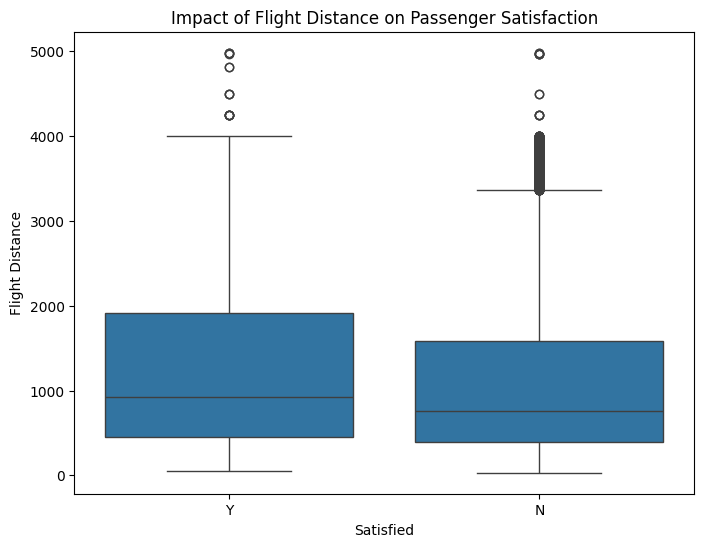

In [ ]:
# Explore the impact of flight duration on satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfied', y='FlightDistance', data=skew_data)
plt.title("Impact of Flight Distance on Passenger Satisfaction")
plt.xlabel("Satisfied")
plt.ylabel("Flight Distance")
plt.show()

The Fig shows in-flight Wi-Fi improves passenger satisfaction ratings.  Having Wi-Fi increases the average rating from unsatisfied to satisfied.

<ipython-input-14-662c6908b73b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Inflightwifi_service', y='Satisfied', data=skew_data, palette=colors)


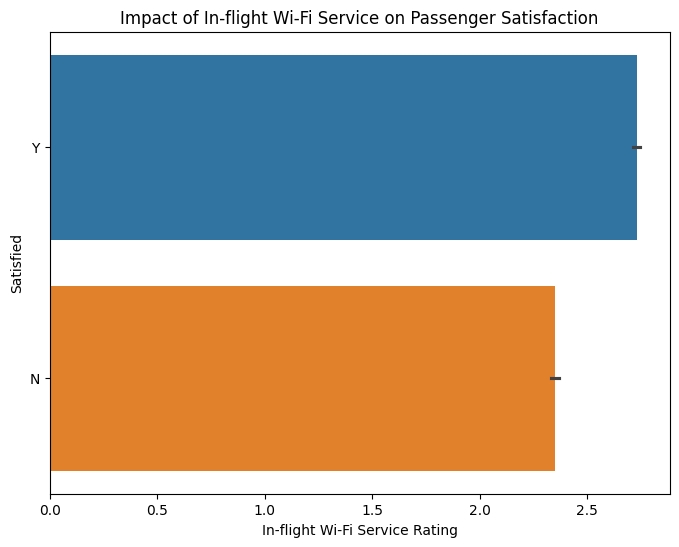

In [ ]:
# Set color palette
colors = ["#1f77b4", "#ff7f0e"]  # Blue for satisfied, orange for unsatisfied

# Visualize the distribution of in-flight Wi-Fi service ratings
plt.figure(figsize=(8, 6))
sns.barplot(x='Inflightwifi_service', y='Satisfied', data=skew_data, palette=colors)
plt.title("Impact of In-flight Wi-Fi Service on Passenger Satisfaction")
plt.xlabel("In-flight Wi-Fi Service Rating")
plt.ylabel("Satisfied")
plt.show()

Analyze the impact of service quality on satisfaction

The Fig shows a positive correlation between onboard service rating and passenger satisfaction. Higher onboard service ratings lead to higher passenger satisfaction. This suggests that passengers who perceive the onboard service as better tend to be more satisfied with their flight overall.


<ipython-input-15-5afc6ffbac2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Satisfied', y='Onboard_service', data=skew_data, palette=colors)


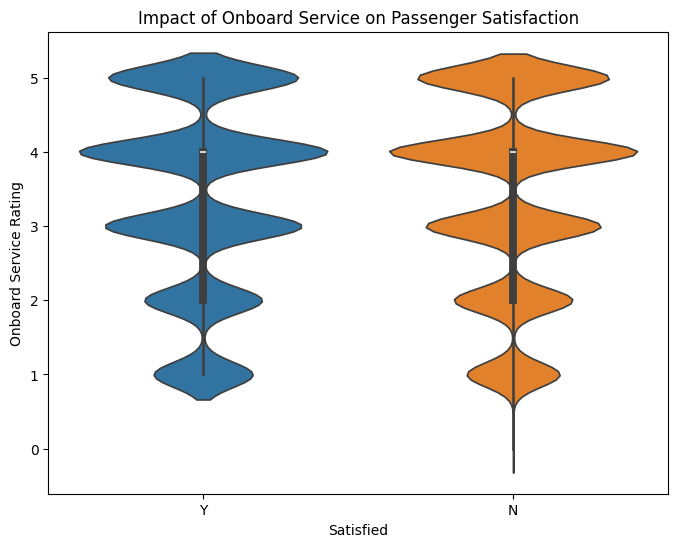

In [ ]:
# # Analyze the impact of service quality on satisfaction


colors = ["#1f77b4", "#ff7f0e"]  # Blue for satisfied, orange for unsatisfied

# Visualize the impact of service quality on satisfaction using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Satisfied', y='Onboard_service', data=skew_data, palette=colors)
plt.title("Impact of Onboard Service on Passenger Satisfaction")
plt.xlabel("Satisfied")
plt.ylabel("Onboard Service Rating")
plt.show()

Explore the influence of cleanliness and hygiene on satisfaction

The graph shows a positive correlation between cleanliness and passenger satisfaction. Passengers on cleaner flights tend to be more satisfied.  The higher the cleanliness rating, the higher the satisfaction rating.

<ipython-input-16-b0a1aef820ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cleanliness', y='Satisfied', data=skew_data, palette=colors)


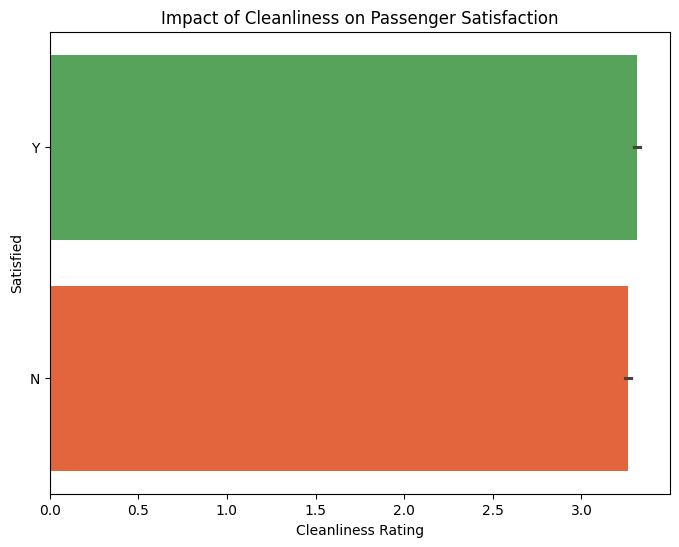

In [ ]:
# Explore the influence of cleanliness and hygiene on satisfaction
# Set color palette
colors = ["#4CAF50", "#FF5722"]  # Green for satisfied, red for unsatisfied

# Visualize the influence of cleanliness and hygiene on satisfaction using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Cleanliness', y='Satisfied', data=skew_data, palette=colors)
plt.title("Impact of Cleanliness on Passenger Satisfaction")
plt.xlabel("Cleanliness Rating")
plt.ylabel("Satisfied")
plt.show()

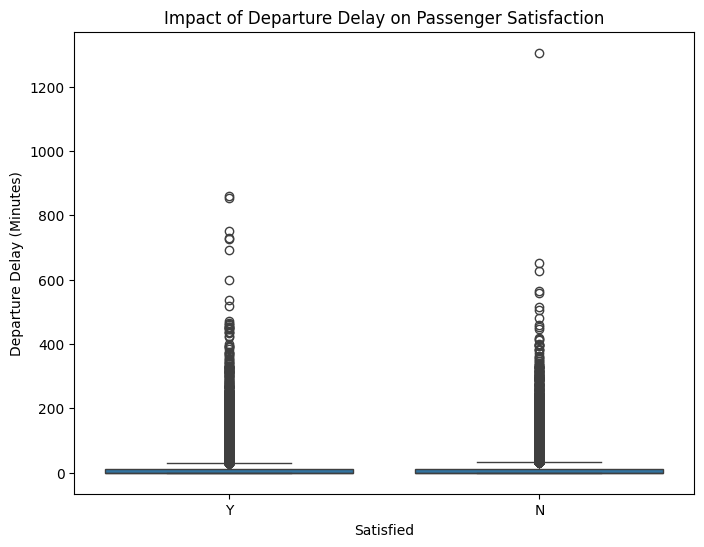

In [ ]:
# Analyze the relationship between on-time performance and satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfied', y='DepartureDelay_Minutes', data=skew_data)
plt.title("Impact of Departure Delay on Passenger Satisfaction")
plt.xlabel("Satisfied")
plt.ylabel("Departure Delay (Minutes)")
plt.show()

<ipython-input-17-83a597fdaa00>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfied', y='Online_booking', data=skew_data, palette=colors)


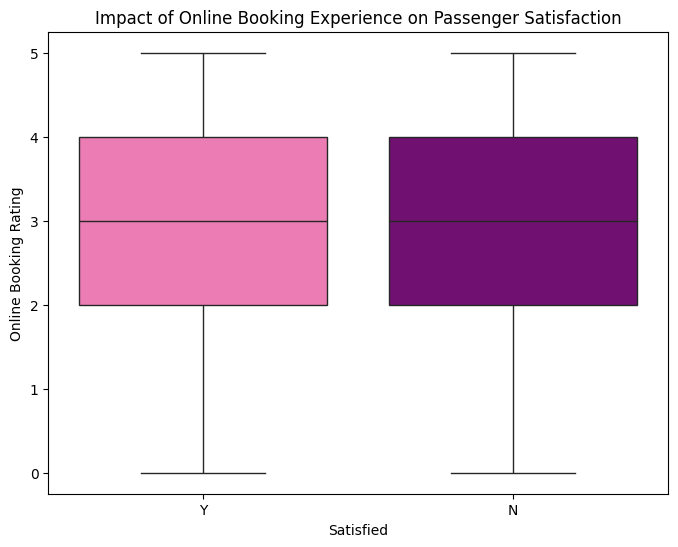

In [ ]:
# Visualize the distribution of booking and check-in experience ratings
# Set color palette
colors = ["#FF69B4", "#800080"]

# Visualize the distribution of booking and check-in experience ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfied', y='Online_booking', data=skew_data, palette=colors)
plt.title("Impact of Online Booking Experience on Passenger Satisfaction")
plt.xlabel("Satisfied")
plt.ylabel("Online Booking Rating")
plt.show()

The box plot  shows that passengers who rated check-in service higher also tended to report higher satisfaction. There is a spread of ratings for both check-in service and satisfaction, but the boxes are shifted upwards together.  In other words, better check-in service seems to lead to more satisfied passengers.

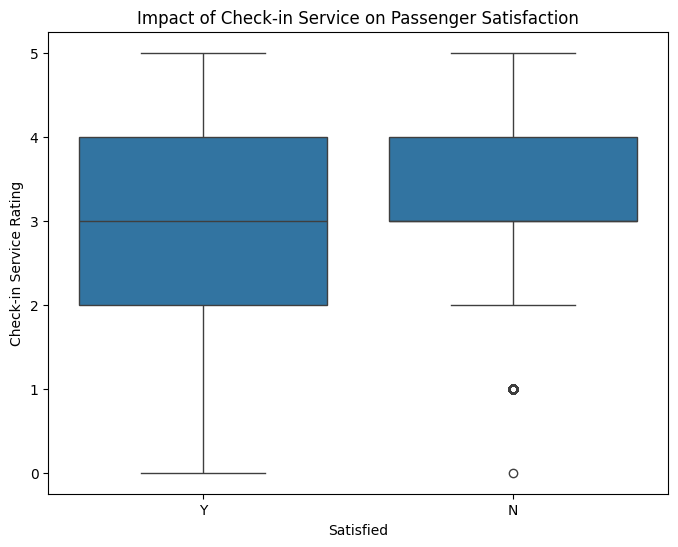

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfied', y='Checkinservice', data=skew_data)
plt.title("Impact of Check-in Service on Passenger Satisfaction")
plt.xlabel("Satisfied")
plt.ylabel("Check-in Service Rating")
plt.show()

#Extract, Transform, Load (ETL)

##
ETL (Extract, Transform, Load) involves extracting data from various sources, transforming it into a consistent format, and loading it into a target destination. EDA (Exploratory Data Analysis) is the process of visually and statistically analyzing data to uncover patterns, trends, and insights, aiding in decision-making processes.

Read the dataset

In [ ]:
skew_data.shape

(57290, 28)

In [ ]:

# Check for missing values
missing_values = skew_data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Class                       1
FlightDistance              1
FlightDistance_Rounded      1
Destination                 1
Continent                   1
Inflightwifi_service        1
Departure_Arrival_time      1
Online_booking              1
Gatelocation                1
Food_drink                  1
Onlineboarding              1
Seatcomfort                 1
Inflightentertainment       1
Onboard_service             1
Legroom_service             1
Baggagehandling             1
Checkinservice              1
Inflight_service            1
Cleanliness                 1
DepartureDelay_Minutes      1
ArrivalDelay_Minutes      176
dtype: int64


In [ ]:
# Impute missing values for numerical columns with the mean
numerical_columns = ['FlightDistance', 'FlightDistance_Rounded', 'Inflightwifi_service', 'Online_booking',
                     'Food_drink', 'Onlineboarding', 'Seatcomfort', 'Inflightentertainment', 'Onboard_service',
                     'Legroom_service', 'Baggagehandling', 'Checkinservice', 'Inflight_service', 'Cleanliness',
                     'DepartureDelay_Minutes', 'ArrivalDelay_Minutes']

for column in numerical_columns:
    skew_data[column].fillna(skew_data[column].mean(), inplace=True)

# Impute missing values for categorical columns with the mode
categorical_columns = ['Class', 'Destination', 'Continent', 'Departure_Arrival_time', 'Gatelocation']

for column in categorical_columns:
    skew_data[column].fillna(skew_data[column].mode()[0], inplace=True)

# Display columns with missing values after imputation
print("Columns with missing values after imputation:")
print(skew_data.isnull().sum())


Columns with missing values after imputation:
Ref                       0
id                        0
Gender                    0
Satisfied                 0
Age                       0
AgeBand                   0
Typeof_Travel             0
Class                     0
FlightDistance            0
FlightDistance_Rounded    0
Destination               0
Continent                 0
Inflightwifi_service      0
Departure_Arrival_time    0
Online_booking            0
Gatelocation              0
Food_drink                0
Onlineboarding            0
Seatcomfort               0
Inflightentertainment     0
Onboard_service           0
Legroom_service           0
Baggagehandling           0
Checkinservice            0
Inflight_service          0
Cleanliness               0
DepartureDelay_Minutes    0
ArrivalDelay_Minutes      0
dtype: int64


In [ ]:
# Aggregation
#  Calculate average ratings for in-flight amenities
average_wifi_rating = skew_data['Inflightwifi_service'].mean()
average_seat_comfort_rating = skew_data['Seatcomfort'].mean()

print (average_wifi_rating)
print (average_seat_comfort_rating)

2.5223186787804126
3.3986660763781953


# Feature Engineering

Feature engineering: Creating age bands from passenger age to categorize individuals into different age groups.

In [ ]:
# Feature Engineering
# Create age bands from passenger age
age_bins = [0, 18, 25, 35, 45, 55, 65, 120]
age_labels = ['Under 18', '18 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 and above']
skew_data['AgeBand'] = pd.cut(skew_data['Age'], bins=age_bins, labels=age_labels)

skew_data.head(5)

,Ref,id,Gender,Satisfied,Age,AgeBand,Typeof_Travel,Class,FlightDistance,FlightDistance_Rounded,...,Seatcomfort,Inflightentertainment,Onboard_service,Legroom_service,Baggagehandling,Checkinservice,Inflight_service,Cleanliness,DepartureDelay_Minutes,ArrivalDelay_Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,460,4760,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,18 to 24,Business travel,Business,235,235,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,1142,4760,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,18 to 24,Business travel,Business,562,560,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,N,61,55 to 64,Business travel,Business,214,4760,...,5,3,3,4,4,3,3,3,0,0.0


# Encoding

Encoding: Converting categorical variables like 'Gender' and 'Satisfied' into numerical representations for analysis and modeling. Displaying the cleaned and transformed dataset with encoded variables.

In [ ]:
# Encoding
# Convert categorical variables into numerical representations
skew_data['Gender'] = skew_data['Gender'].map({'Male': 0, 'Female': 1})
skew_data['Satisfied'] = skew_data['Satisfied'].map({'N': 0, 'Y': 1})

# Display the cleaned and transformed dataset
skew_data.head(10)

,Ref,id,Gender,Satisfied,Age,AgeBand,Typeof_Travel,Class,FlightDistance,FlightDistance_Rounded,...,Seatcomfort,Inflightentertainment,Onboard_service,Legroom_service,Baggagehandling,Checkinservice,Inflight_service,Cleanliness,DepartureDelay_Minutes,ArrivalDelay_Minutes
0,0,70172,0,1,13,Under 18,Personal Travel,Eco Plus,460,4760,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,0,0,25,18 to 24,Business travel,Business,235,235,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,1,1,26,25 to 34,Business travel,Business,1142,4760,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,1,1,25,18 to 24,Business travel,Business,562,560,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,0,0,61,55 to 64,Business travel,Business,214,4760,...,5,3,3,4,4,3,3,3,0,0.0
5,5,111157,1,1,26,25 to 34,Personal Travel,Eco,1180,1180,...,1,1,3,4,4,4,4,1,0,0.0
6,6,82113,0,0,47,45 to 54,Personal Travel,Eco,1276,4760,...,2,2,3,3,4,3,5,2,9,23.0
7,7,96462,1,0,52,45 to 54,Business travel,Business,2035,4760,...,5,5,5,5,5,4,5,4,4,0.0
8,8,79485,1,1,41,35 to 44,Business travel,Business,853,4760,...,3,1,1,2,1,4,1,2,0,0.0
9,9,65725,0,0,20,18 to 24,Business travel,Eco,1061,1060,...,3,2,2,3,4,4,3,2,0,0.0


#EDA


EDA (Exploratory Data Analysis): The process of visually and statistically examining data to uncover patterns, trends, and relationships, aiding in understanding and making decisions.







In [ ]:
# Descriptive statistics
print("Descriptive Statistics:")
print(skew_data.describe())


Descriptive Statistics:
                 Ref             id         Gender      Satisfied  \
count  103904.000000  103904.000000  103904.000000  103904.000000   
mean    51951.500000   64924.210502       0.507459       0.449165   
std     29994.645522   37463.812252       0.499947       0.497411   
min         0.000000       1.000000       0.000000       0.000000   
25%     25975.750000   32533.750000       0.000000       0.000000   
50%     51951.500000   64856.500000       1.000000       0.000000   
75%     77927.250000   97368.250000       1.000000       1.000000   
max    103903.000000  129880.000000       1.000000       1.000000   

                 Age  FlightDistance  FlightDistance_Rounded  \
count  103904.000000   103904.000000           103904.000000   
mean       39.379706     1189.448375             4164.071066   
std        15.114964      997.147281             1346.755749   
min         7.000000       31.000000              235.000000   
25%        27.000000      414.0000

In [ ]:
# Data Info
print("Data Overview:")
print(skew_data.info())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Ref                     103904 non-null  int64   
 1   id                      103904 non-null  int64   
 2   Gender                  103904 non-null  int64   
 3   Satisfied               103904 non-null  int64   
 4   Age                     103904 non-null  int64   
 5   AgeBand                 103904 non-null  category
 6   Typeof_Travel           103904 non-null  object  
 7   Class                   103904 non-null  object  
 8   FlightDistance          103904 non-null  int64   
 9   FlightDistance_Rounded  103904 non-null  int64   
 10  Destination             103904 non-null  object  
 11  Continent               103904 non-null  object  
 12  Inflightwifi_service    103904 non-null  int64   
 13  Departure_Arrival_time  103904 non-null  int

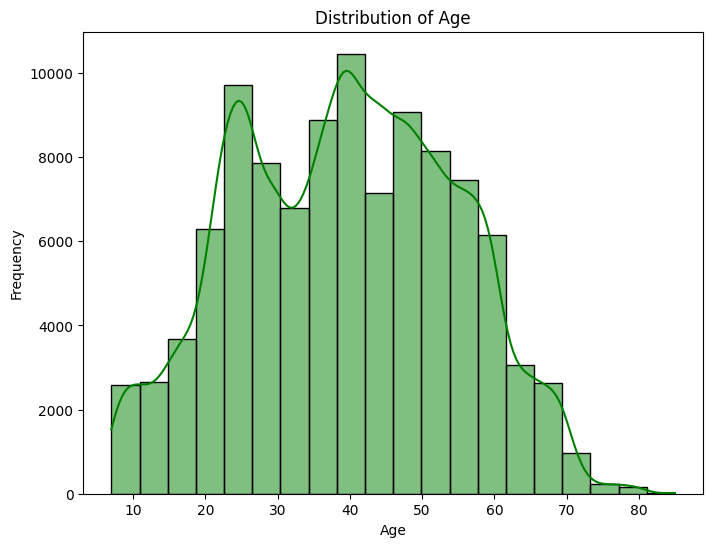

In [ ]:
# Univariate Analysis: Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(skew_data['Age'], bins=20, kde=True, color='green')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


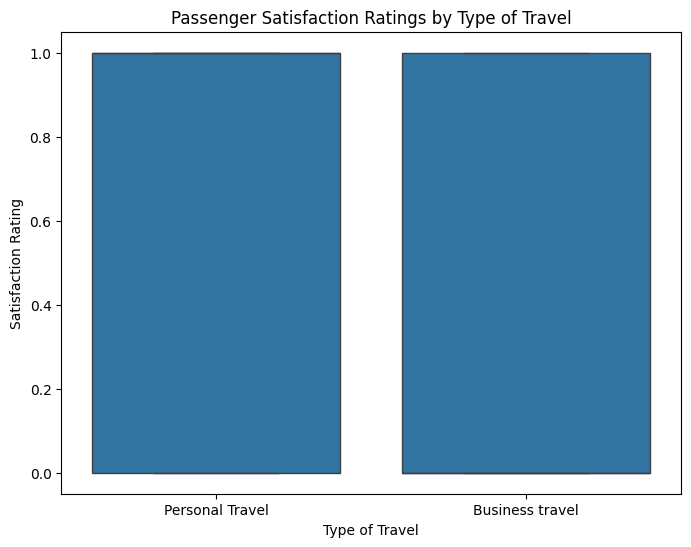

In [ ]:
# Boxplot of Passenger Satisfaction Ratings by Type of Travel
plt.figure(figsize=(8, 6))
sns.boxplot(x='Typeof_Travel', y='Satisfied', data=skew_data)
plt.title("Passenger Satisfaction Ratings by Type of Travel")
plt.xlabel("Type of Travel")
plt.ylabel("Satisfaction Rating")
plt.show()

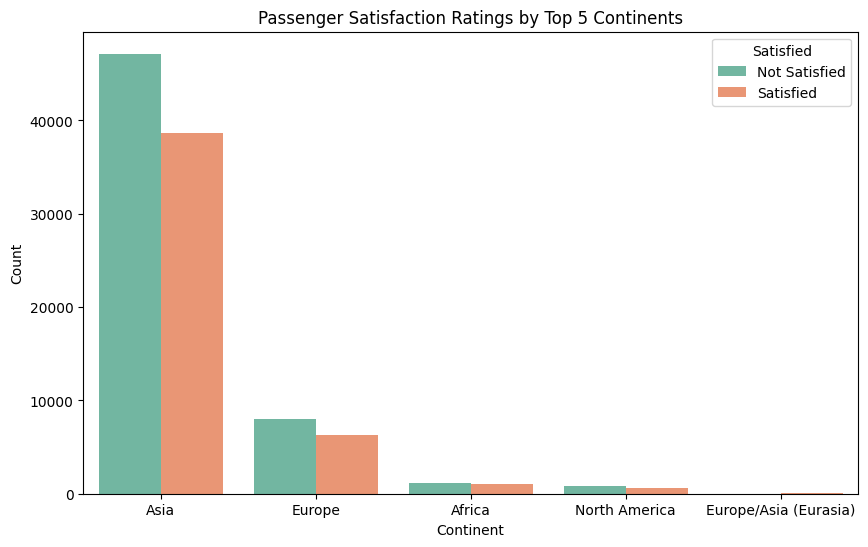

In [ ]:
# Calculate the count of passengers by continent
continent_counts = skew_data['Continent'].value_counts()

# Select the top 5 continents
top_5_continents = continent_counts.head(5).index

# Filter the dataset for the top 5 continents
top_5_data = skew_data[skew_data['Continent'].isin(top_5_continents)]

# Plot the bar plot for the top 5 continents
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', hue='Satisfied', data=top_5_data, palette='Set2')
plt.title("Passenger Satisfaction Ratings by Top 5 Continents")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.legend(title='Satisfied', labels=['Not Satisfied', 'Satisfied'])
plt.show()


In [ ]:
skew_data.head(5)

,Ref,id,Gender,Satisfied,Age,AgeBand,Typeof_Travel,Class,FlightDistance,FlightDistance_Rounded,...,Seatcomfort,Inflightentertainment,Onboard_service,Legroom_service,Baggagehandling,Checkinservice,Inflight_service,Cleanliness,DepartureDelay_Minutes,ArrivalDelay_Minutes
0,0,70172,0,1,13,Under 18,Personal Travel,Eco Plus,460,4760,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,0,0,25,18 to 24,Business travel,Business,235,235,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,1,1,26,25 to 34,Business travel,Business,1142,4760,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,1,1,25,18 to 24,Business travel,Business,562,560,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,0,0,61,55 to 64,Business travel,Business,214,4760,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
# Selecting only numerical columns for correlation calculation
data = skew_data.select_dtypes(include=['int64', 'float64'])

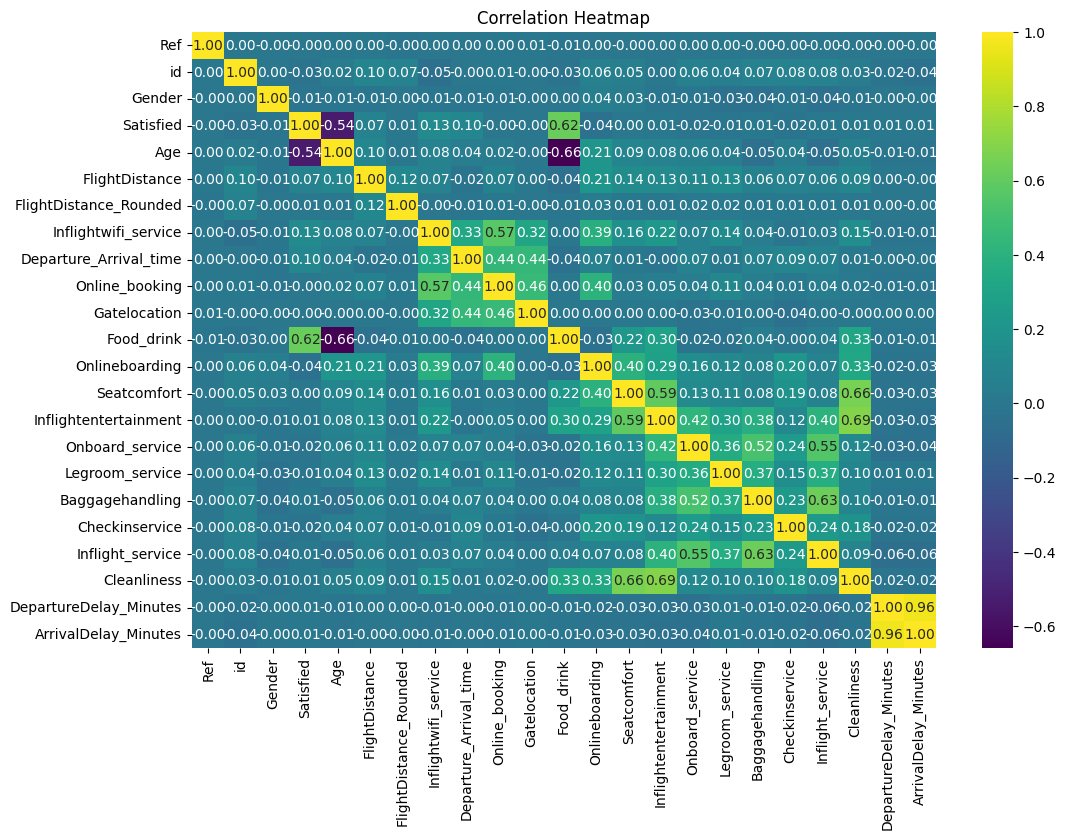

In [ ]:
# Plotting the correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Selecting features and target variable
X = data[['Gender', 'Age', 'FlightDistance', 'Inflightwifi_service', 'Online_booking', 'Seatcomfort', 'Inflightentertainment', 'Cleanliness']]
y = data['Satisfied']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier


The accuracy score for the Random Forest model is 0.8999, indicating a high level of predictive accuracy.

In [ ]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Random Forest:", accuracy)

Accuracy Random Forest: 0.8999085703286656


In [ ]:
# Classification report
print("\nClassification Report of Random Forest:")
print(classification_report(y_test, y_pred))


Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11574
           1       0.87      0.91      0.89      9207

    accuracy                           0.90     20781
   macro avg       0.90      0.90      0.90     20781
weighted avg       0.90      0.90      0.90     20781



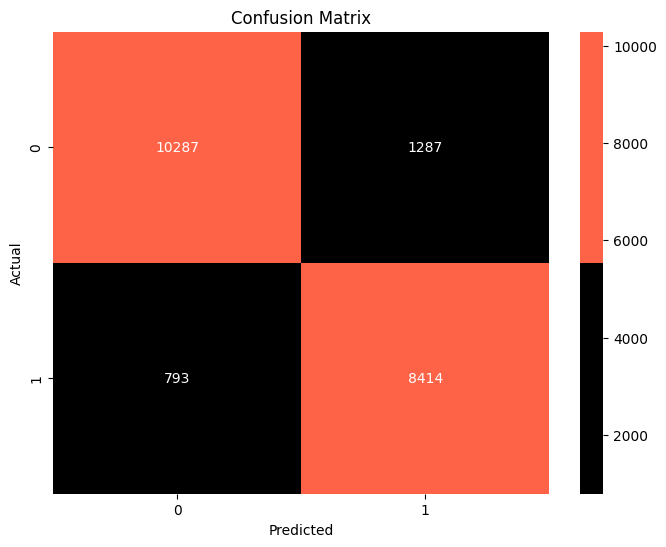

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

colors = ['black', '#FF6347']  # Black and red colors
cmap = mcolors.ListedColormap(colors)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#XGBoost classifier



The XGBoost classifier achieved an accuracy of 0.9132, demonstrating its effectiveness in predictive modeling.

In [ ]:
# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_xgb = xgb_classifier.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy XGBoost:", accuracy_xgb)

Accuracy XGBoost: 0.9132380539916269


In [ ]:
# Classification report
print("\nClassification Report of XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Classification Report of XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     11574
           1       0.87      0.94      0.91      9207

    accuracy                           0.91     20781
   macro avg       0.91      0.92      0.91     20781
weighted avg       0.92      0.91      0.91     20781



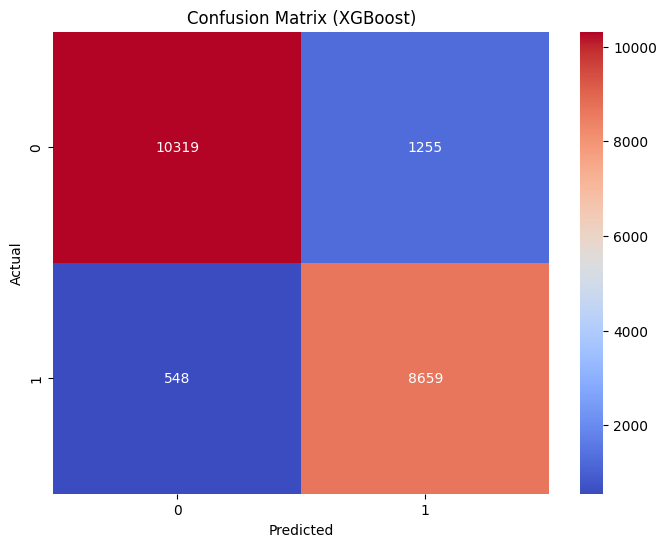

In [ ]:
# Calculate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Comaprision


XGBoost and Random Forest exhibit similar performance, with XGBoost achieving a precision of 91.32% compared to Random Forest's 89.99%. Despite their close results, XGBoost edges ahead with a slightly higher accuracy, boasting a one percent improvement. This suggests XGBoost's enhanced efficiency in handling the dataset under examination.

However, when selecting between the two algorithms, other factors such as dataset size, complexity, and interpretability come into play. Different use cases may prioritize these aspects differently, influencing the choice between XGBoost and Random Forest.

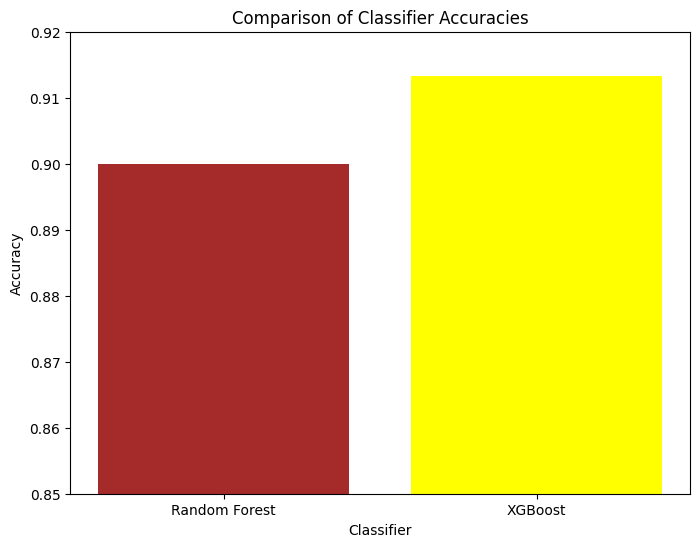

In [ ]:
#Comparision
# Labels and accuracies
classifiers = ['Random Forest', 'XGBoost']
accuracies = [accuracy, accuracy_xgb]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['brown', 'yellow'])
plt.title('Comparison of Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.85, 0.92)
plt.show()